In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv('data.csv')

In [63]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [64]:
df.columns=df.iloc[0]
df.head()


,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [65]:
df=df.drop(index = 0).reset_index(drop=True)
df.columns = ["Channel Group", "DateHour", "Users", "Sessions", "Engage Sessions", 
              "Average engagement time per session", "Engaged sessions per user", 
              "Events per session"," Engagement rate", "Event count"]


In [26]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engage Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engage Sessions                      3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8    Engagement rate                     3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [67]:
df["DateHour"]=pd.to_datetime(df["DateHour"],format="%Y%m%d%H",errors='coerce')


In [68]:
numeric_columns=df.columns.drop(["Channel Group","DateHour"])
df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric,errors='coerce')
df["Hour"]=df["DateHour"].dt.hour
df.head()


,Channel Group,DateHour,Users,Sessions,Engage Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engage Sessions                      3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8    Engagement rate                     3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [70]:
df.describe()

,DateHour,Users,Sessions,Engage Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


#  sessions and user over time

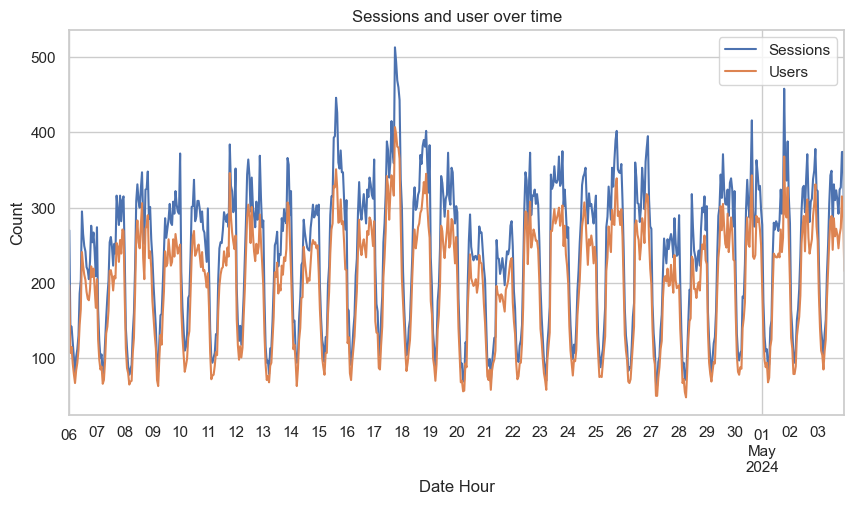

In [71]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and user over time")
plt.xlabel("Date Hour")
plt.ylabel("Count")
plt.show()

# total users by channel


C:\Users\Admin\AppData\Local\Temp\ipykernel_12420\4130948060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Channel Group" , y="Users",  estimator=np.sum,palette="viridis")


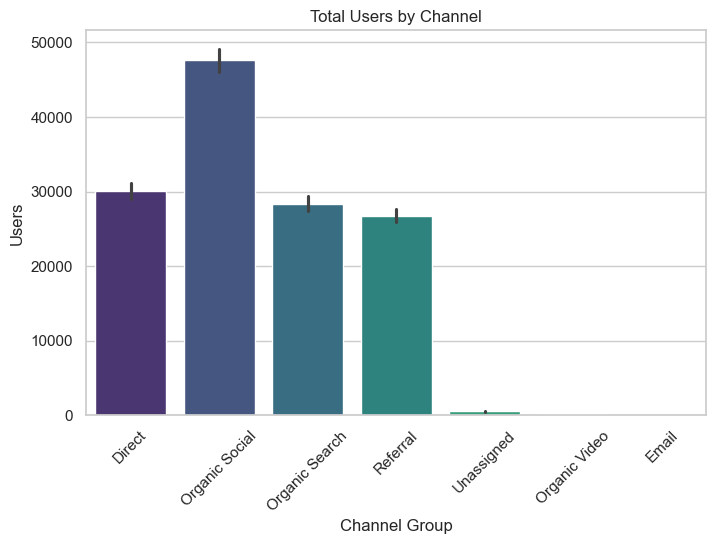

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Channel Group" , y="Users",  estimator=np.sum,palette="viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

In [73]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engage Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


# Average engaging time by Channel

C:\Users\Admin\AppData\Local\Temp\ipykernel_12420\3133271953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Channel Group",y="Average engagement time per session", estimator=np.mean, palette="magma")


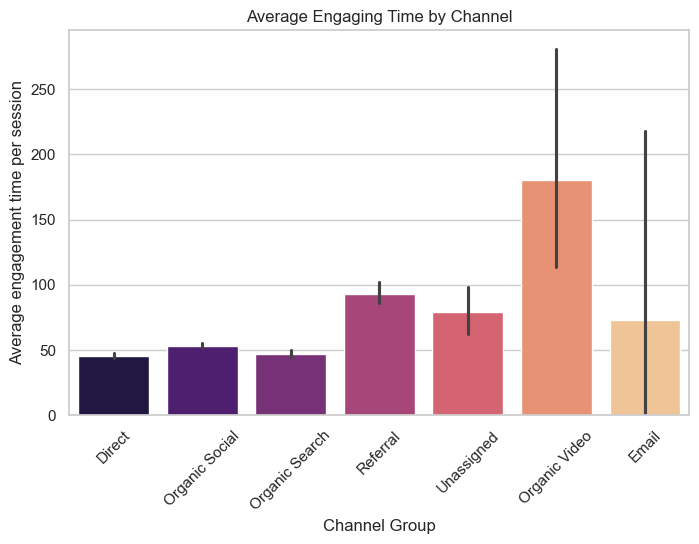

In [74]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Channel Group",y="Average engagement time per session", estimator=np.mean, palette="magma")
plt.title("Average Engaging Time by Channel")
plt.xticks(rotation=45)
plt.show()

# Engagement sessions per user  distribution by channel


C:\Users\Admin\AppData\Local\Temp\ipykernel_12420\1414173071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Channel Group",y="Engaged sessions per user", palette="coolwarm")


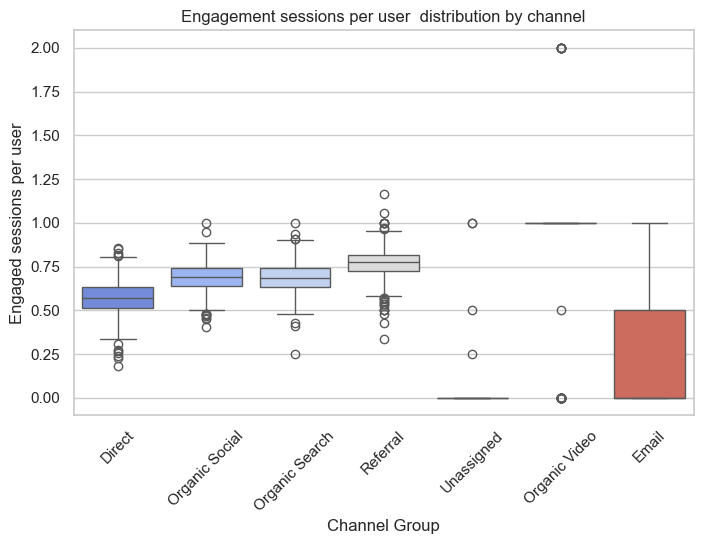

In [84]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="Channel Group",y="Engaged sessions per user", palette="coolwarm")
plt.title("Engagement sessions per user  distribution by channel")
plt.xticks(rotation=45)
plt.show()

# engage vs non engaged sessions

In [92]:
df["Non-engage Sessions"] = df["Sessions"] - df["Engage Sessions"]



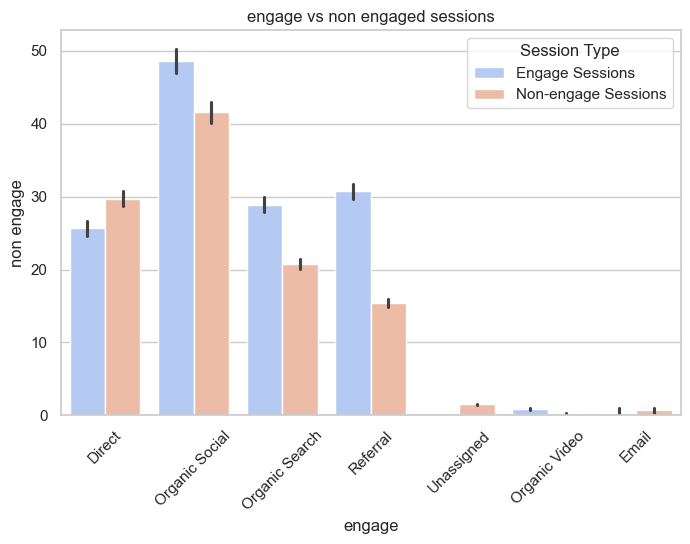

In [93]:

df_melted = df.melt(id_vars="Channel Group", 
                    value_vars=["Engage Sessions", "Non-engage Sessions"], 
                    var_name="Session Type", 
                    value_name="Count")


plt.figure(figsize=(8,5))
plt.title("engage vs non engaged sessions")
sns.barplot(data=df_melted, x="Channel Group", y="Count", hue="Session Type", palette="coolwarm")
plt.xlabel("engage")
plt.ylabel("non engage")
plt.xticks(rotation=45)
plt.show()


# traffic by hour and channel

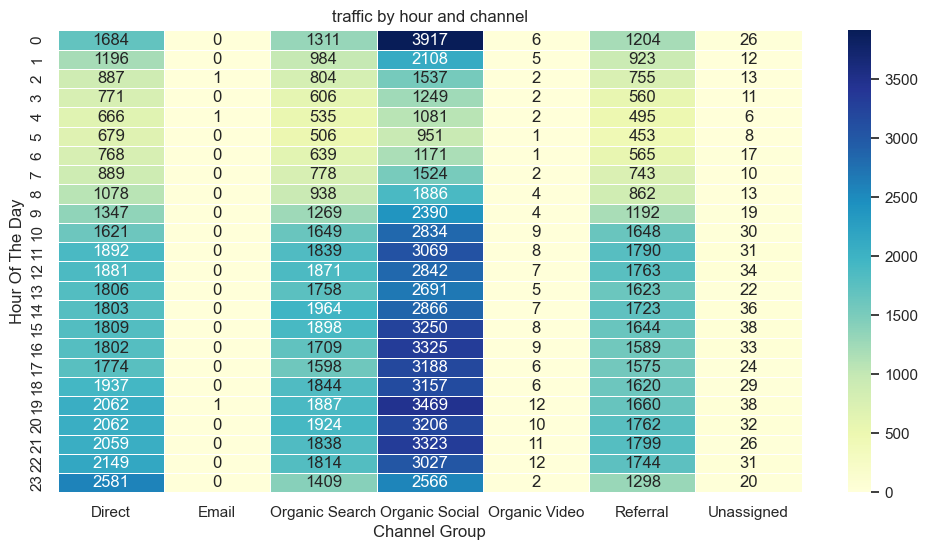

In [95]:
heatmap_data=df.groupby(["Hour","Channel Group"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data,cmap="YlGnBu",linewidth=.5,annot=True,fmt='.0f')
plt.title("traffic by hour and channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour Of The Day")

plt.show()



In [103]:

df.columns = df.columns.str.strip()


In [106]:
print(df.columns.tolist())


['Channel Group', 'DateHour', 'Users', 'Sessions', 'Engage Sessions', 'Average engagement time per session', 'Engaged sessions per user', 'Events per session', 'Engagement rate', 'Event count', 'Hour', 'Non-engage Sessions']
